In [1]:
from timeit import default_timer as timer
def crop_image_with_retinaFace(images):
    from retinaface import RetinaFace
    from timeit import default_timer as timer
    tt=0
    for i in images:
        start=timer()
        image=cv2.imread(i)
        o = RetinaFace.detect_faces(i)
        if isinstance(o,(tuple)):
            print("already done")
            continue
        else:
            coordinates=o["face_1"]["facial_area"]
            x,y,w,h=coordinates
            image[x:w]
            imgf=image[y:h, x:w]
            cv2.imwrite(i,imgf)
            end=timer()
            tt+=end-start
            print(f"{i} done")
    print("average time taken is ",tt/len(images))
def crop_image_with_faceReco(images):
    import os
    import glob
    from PIL import Image
    import face_recognition
    import cv2
    from timeit import default_timer as timer
    tt=0
    for i in images:
        start=timer()
        image=cv2.imread(i)
        face_locations = face_recognition.face_locations(image,model="cnn")
        if len(face_locations)==0:
            print("already done")
            continue
        else:
            top, right, bottom, left = face_locations[0]
            face_image = image[top:bottom, left:right]
            Image.fromarray(face_image)
            cv2.imwrite(i,face_image)
            print(f"{i} done")
        
    print("average time taken is ",tt/len(images))
start=timer()
crop_image_with_faceReco(train)
crop_image_with_faceReco(test)
end=timer()
print("total time taken to crop the images is ",end-start)

ValueError: ('Input image file path (', 'WhatsApp Image 2023-12-10 at 23.02.14.jpeg', ') does not exist.')

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


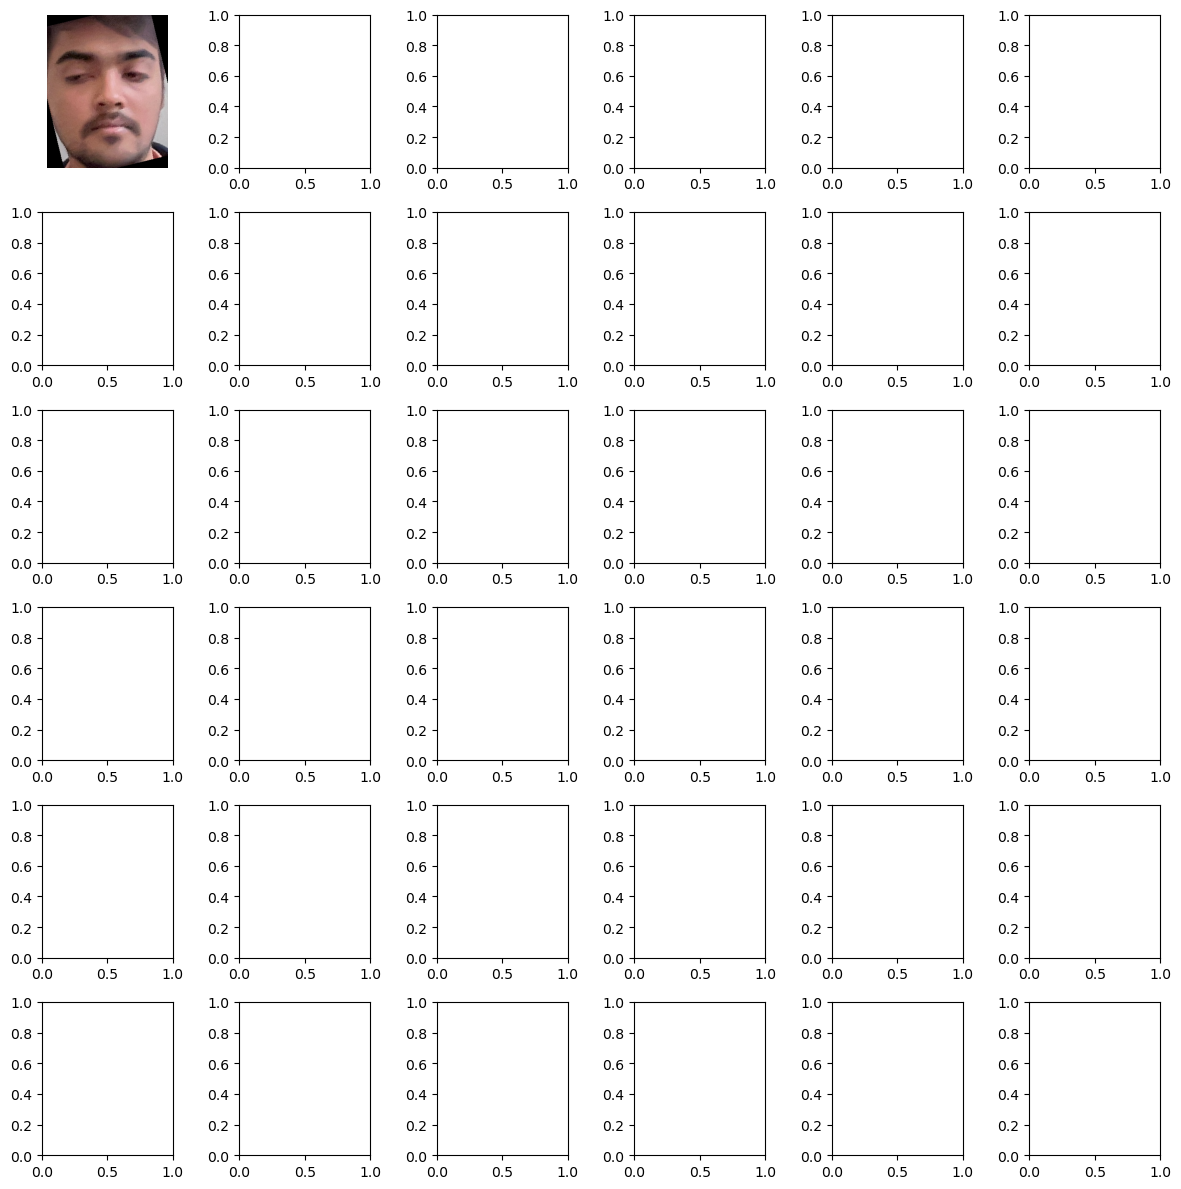

In [3]:
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from retinaface import RetinaFace
dataPath="data/train"
files=os.listdir(dataPath)
filepath=[]
for file in files:
    file=os.path.join(dataPath,file)
    filepath.append(file)
filepath
imagepath=[]
for image in os.listdir(filepath[0]):
    imgpth=os.path.join(filepath[0],image)
    imagepath.append(imgpth)
imagepath

faces = RetinaFace.extract_faces(img_path =imagepath[0], align = True)
print(faces[0])
import matplotlib.pyplot as plt
num_images = len(faces)
rows = 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # fig is an object which contains the whole final image
                                                        # axes is a list of subplots for each image

for i, ax in enumerate(axes.flat): # axes.flat converts axes into a 1D list and returns an index for the corresponding axes
    if i < num_images:
        ax.imshow(faces[i], cmap='gray')  # Assuming grayscale images; adjust cmap if needed
        ax.axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjusts spacing between subplots for better appearance
plt.show()
    

In [11]:
Image.fromarray(faces[0])
imagepath[0]
    

'data/train/mradul/image48.jpg'

In [119]:
o = RetinaFace.detect_faces(imagepath[0])
if isinstance(o, (tuple)):
    print("should skip")
isinstance(o, (list, np.ndarray))
o

should skip


(array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5, 2), dtype=float64))

In [63]:
orgimg.shape

(720, 1280, 3)

In [ ]:
f.shape

In [ ]:
import numpy as np
c=np.resize(f,((505,691,3)))
original_image[y:y+h, x:x+w]=c
cv2.imwrite('output_image.jpg', original_image)

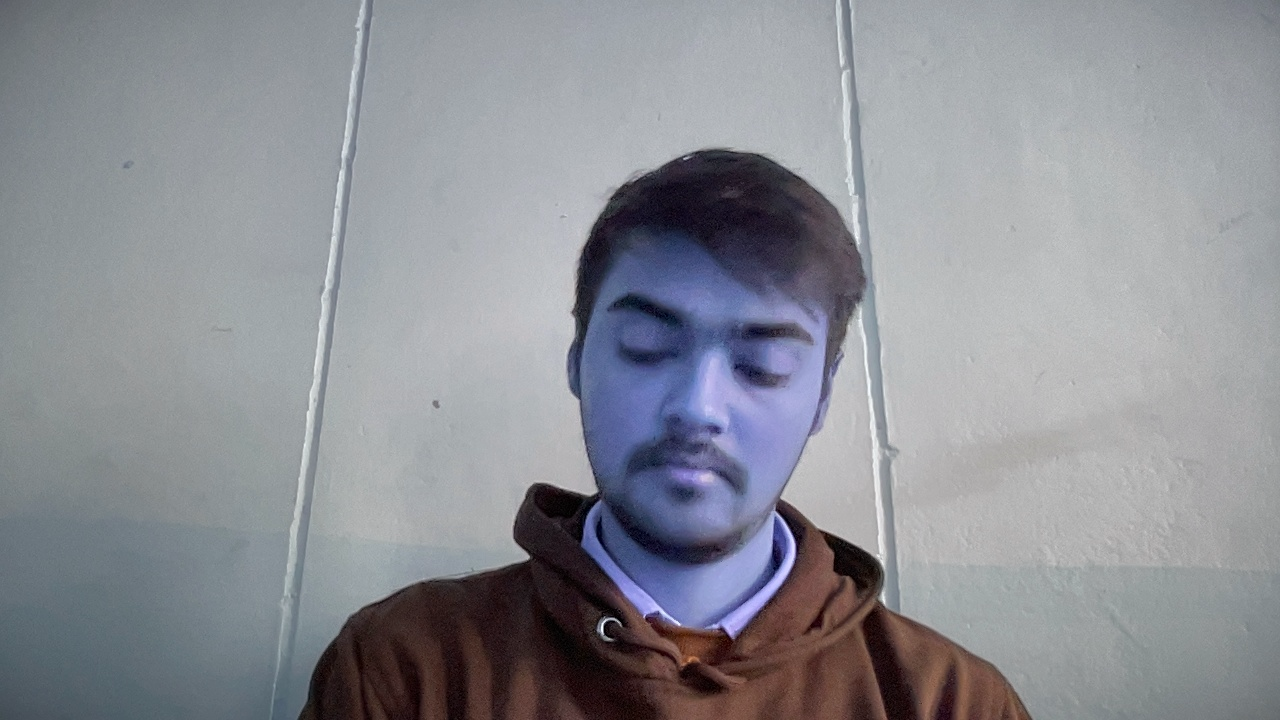

In [80]:
orgimg=cv2.imread(imagepath[1])
Image.fromarray(orgimg)

<PIL.Image.Image image mode=RGB size=1280x720 at 0x290DBD0D0>


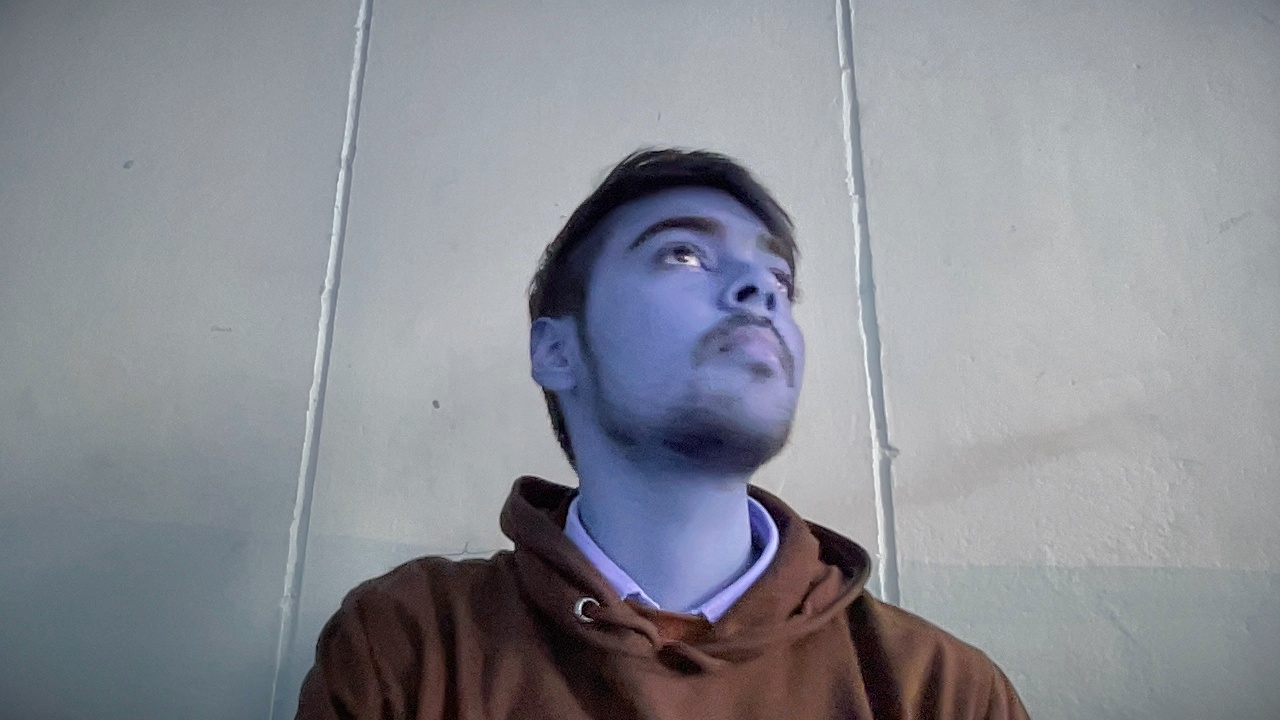

In [110]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image=cv2.imread(imagepath[11])
print(Image.fromarray(image))
# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)
top, right, bottom, left = face_location
face_image = image[top:bottom, left:right]
pil_image = Image.fromarray(face_image)
cv2.imwrite(imagepath[10],face_image)
image=cv2.imread(imagepath[11])
Image.fromarray(image)